In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'D:\Datasets\StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape

(1000, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Feature Engineering

In [5]:
data['total'] = round((data['math score'] + data['writing score'] + data ['reading score'])/3,2)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [6]:
data['total'].describe()

count    1000.000000
mean       67.770580
std        14.257311
min         9.000000
25%        58.330000
50%        68.330000
75%        77.670000
max       100.000000
Name: total, dtype: float64

In [7]:
min_passing_marks = 55
data['status'] = np.where(data['total']>=min_passing_marks ,1,0)    # 1 - Pass    0 - Fail 
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,status
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,1
1,female,group C,some college,standard,completed,69,90,88,82.33,1
2,female,group B,master's degree,standard,none,90,95,93,92.67,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,0
4,male,group C,some college,standard,none,76,78,75,76.33,1


In [8]:
data.drop(['math score','reading score','writing score','total'],axis=1,inplace=True)

In [9]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,status
0,female,group B,bachelor's degree,standard,none,1
1,female,group C,some college,standard,completed,1
2,female,group B,master's degree,standard,none,1
3,male,group A,associate's degree,free/reduced,none,0
4,male,group C,some college,standard,none,1


## Gender

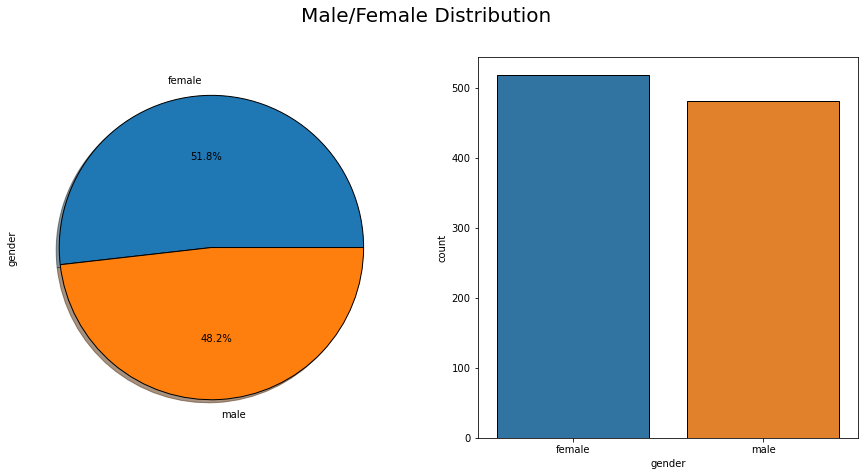

In [10]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
data['gender'].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',ax=ax[0],wedgeprops={'edgecolor':'black'})
sbn.countplot(x='gender',data=data,ax=ax[1],edgecolor='black')
plt.suptitle('Male/Female Distribution',fontsize=20)
plt.show()

In [11]:
data['gender'] = np.where(data['gender']=='male',1,0)

In [12]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,status
0,0,group B,bachelor's degree,standard,none,1
1,0,group C,some college,standard,completed,1
2,0,group B,master's degree,standard,none,1
3,1,group A,associate's degree,free/reduced,none,0
4,1,group C,some college,standard,none,1


## Race/Ethnicity

In [13]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

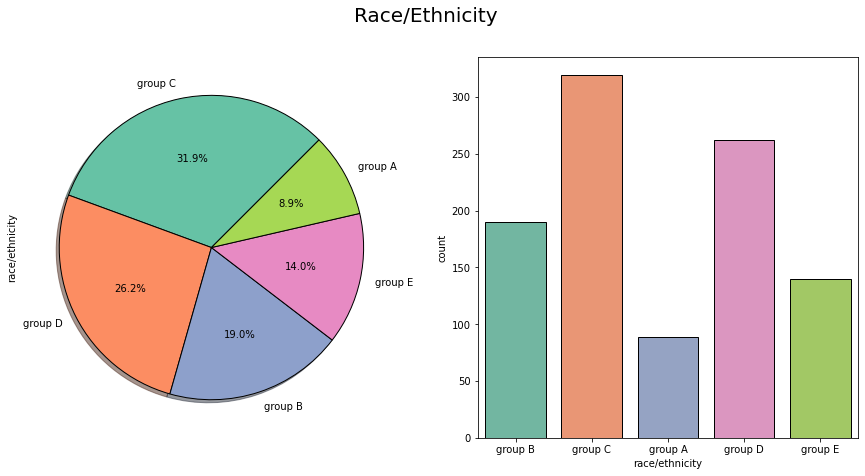

In [14]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
data['race/ethnicity'].value_counts().plot.pie(wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%',ax=ax[0],startangle=45,colors=sbn.color_palette('Set2'))
sbn.countplot(x='race/ethnicity',data=data,ax=ax[1],palette=('Set2'),edgecolor='black')
plt.suptitle('Race/Ethnicity',fontsize=20)
plt.show()

In [15]:
races=pd.get_dummies(data['race/ethnicity'],drop_first=True)
races.head()

,group B,group C,group D,group E
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [16]:
data = pd.concat([data,races],axis=1)
data.drop('race/ethnicity',axis=1,inplace=True)
data.head()

,gender,parental level of education,lunch,test preparation course,status,group B,group C,group D,group E
0,0,bachelor's degree,standard,none,1,1,0,0,0
1,0,some college,standard,completed,1,0,1,0,0
2,0,master's degree,standard,none,1,1,0,0,0
3,1,associate's degree,free/reduced,none,0,0,0,0,0
4,1,some college,standard,none,1,0,1,0,0


## Parental Level Of Education

In [17]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

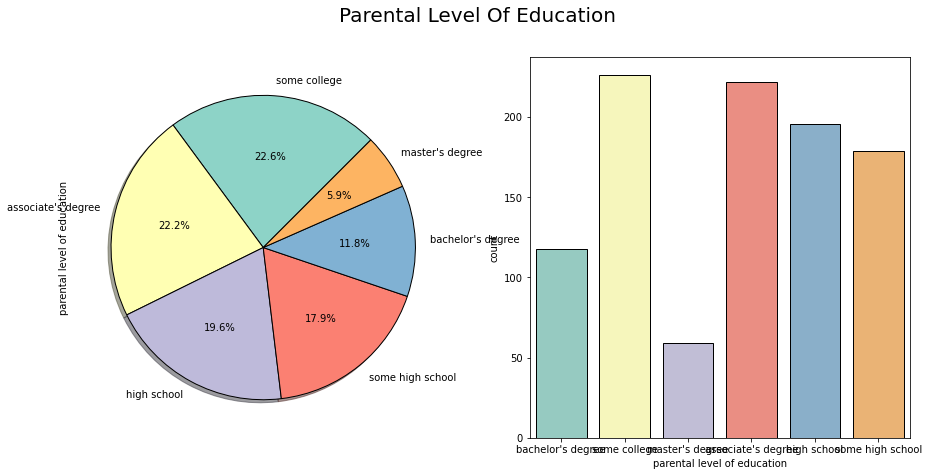

In [18]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
data['parental level of education'].value_counts().plot.pie(wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%',ax=ax[0],startangle=45,colors=sbn.color_palette('Set3'))
sbn.countplot(x='parental level of education',data=data,ax=ax[1],palette=('Set3'),edgecolor='black')
plt.suptitle('Parental Level Of Education',fontsize=20)
plt.show()

In [19]:
# using labelencoder

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder = LabelEncoder()
data['parental level of education']=encoder.fit_transform(data['parental level of education'])
data.head()

,gender,parental level of education,lunch,test preparation course,status,group B,group C,group D,group E
0,0,1,standard,none,1,1,0,0,0
1,0,4,standard,completed,1,0,1,0,0
2,0,3,standard,none,1,1,0,0,0
3,1,0,free/reduced,none,0,0,0,0,0
4,1,4,standard,none,1,0,1,0,0


## Lunch

In [22]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

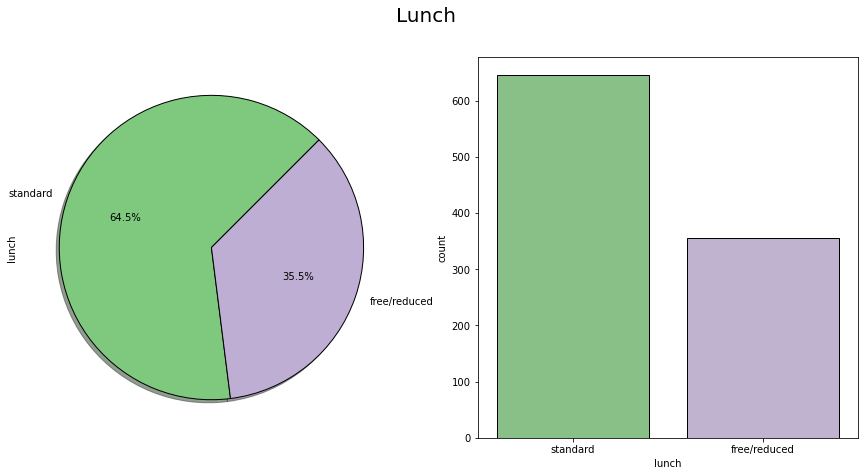

In [23]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
data['lunch'].value_counts().plot.pie(wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%',ax=ax[0],startangle=45,colors=sbn.color_palette('Accent'))
sbn.countplot(x='lunch',data=data,ax=ax[1],palette=('Accent'),edgecolor='black')
plt.suptitle('Lunch',fontsize=20)
plt.show()

In [24]:
data['lunch'] = np.where(data['lunch']=='standard',1,0)   #1 - standard   2 - free/reduced
data.head()

,gender,parental level of education,lunch,test preparation course,status,group B,group C,group D,group E
0,0,1,1,none,1,1,0,0,0
1,0,4,1,completed,1,0,1,0,0
2,0,3,1,none,1,1,0,0,0
3,1,0,0,none,0,0,0,0,0
4,1,4,1,none,1,0,1,0,0


## Test Preparation Course

In [25]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

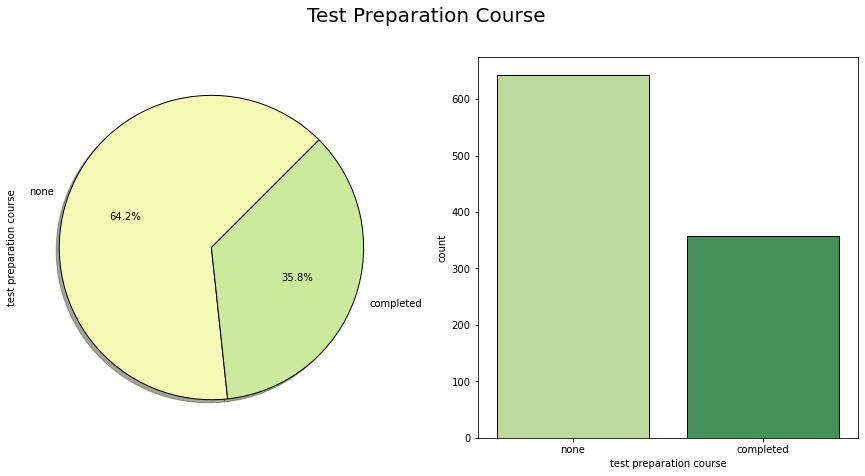

In [26]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
data['test preparation course'].value_counts().plot.pie(wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%',ax=ax[0],startangle=45,colors=sbn.color_palette('YlGn'))
sbn.countplot(x='test preparation course',data=data,ax=ax[1],palette=('YlGn'),edgecolor='black')
plt.suptitle('Test Preparation Course',fontsize=20)
plt.show()

In [27]:
data['test preparation course'] = np.where(data['test preparation course']=='none',0,1)   # none - 0 , completed - 1
data.head()

,gender,parental level of education,lunch,test preparation course,status,group B,group C,group D,group E
0,0,1,1,0,1,1,0,0,0
1,0,4,1,1,1,0,1,0,0
2,0,3,1,0,1,1,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,4,1,0,1,0,1,0,0


#### Featured Engineering Done!!!Now seperating dependent and independent features..

In [28]:
x = data.drop('status',axis=1)
y = data['status']
print(y.head())

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int32


In [29]:
y.value_counts()

1    809
0    191
Name: status, dtype: int64

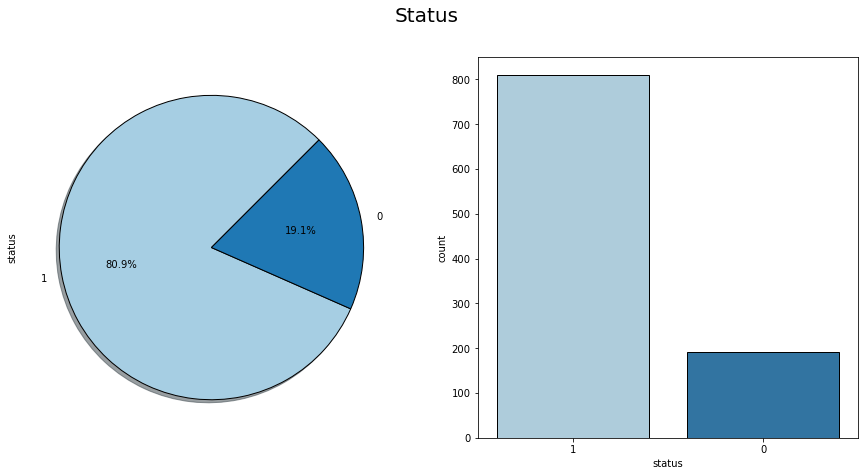

In [30]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
data['status'].value_counts().plot.pie(wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%',ax=ax[0],startangle=45,colors=sbn.color_palette('Paired'))
sbn.countplot(x='status',data=data,ax=ax[1],palette=('Paired'),edgecolor='black',order=[1,0])
plt.suptitle('Status',fontsize=20)
plt.show()

#### The dataset is imbalanced i.e the dependent features are not normally distributed so to fix this we use over sampling or under sampling.Mostly over sampling is preferred because under sampling can cause loss of important data

In [31]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [32]:
x,y = ros.fit_sample(x,y)

In [33]:
print(x.shape,y.shape)

(1618, 8) (1618,)


In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1618 non-null   int32
 1   parental level of education  1618 non-null   int32
 2   lunch                        1618 non-null   int32
 3   test preparation course      1618 non-null   int32
 4   group B                      1618 non-null   uint8
 5   group C                      1618 non-null   uint8
 6   group D                      1618 non-null   uint8
 7   group E                      1618 non-null   uint8
dtypes: int32(4), uint8(4)
memory usage: 31.7 KB


In [35]:
y.shape

(1618,)

In [36]:
y.value_counts()

1    809
0    809
Name: status, dtype: int64

#### Hence by using RandomOverSampler we have balanced the dataset

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
x = preprocessing.normalize(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [39]:
models = [[
    'Logistic Regression : '  ,LogisticRegression()],
    ['KNeighborsClassifier : ' ,KNeighborsClassifier()],
    ['Decisio Tree : '         ,DecisionTreeClassifier()],
    ['Random Forest : '        ,RandomForestClassifier()],
    ['AdaBoost : '            , AdaBoostClassifier()
],
]
print("-------------- Results --------------")
score = []
for name,model in models:
    model = model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    score.append(accuracy_score(y_test,y_pred))
    clf_report = classification_report(y_test,y_pred)
    print(name ,'\n' , acc,'\n',cnf_matrix,'\n',clf_report)

-------------- Results --------------
Logistic Regression :  
 0.6666666666666666 
 [[176  55]
 [107 148]] 
               precision    recall  f1-score   support

           0       0.62      0.76      0.68       231
           1       0.73      0.58      0.65       255

    accuracy                           0.67       486
   macro avg       0.68      0.67      0.67       486
weighted avg       0.68      0.67      0.66       486

KNeighborsClassifier :  
 0.7119341563786008 
 [[179  52]
 [ 88 167]] 
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       231
           1       0.76      0.65      0.70       255

    accuracy                           0.71       486
   macro avg       0.72      0.71      0.71       486
weighted avg       0.72      0.71      0.71       486

Decisio Tree :  
 0.7242798353909465 
 [[188  43]
 [ 91 164]] 
               precision    recall  f1-score   support

           0       0.67      0.81      0.74   

In [40]:
ml_models=['LogisticRegression' ,
      'K-Neighbors Classifier',
      'Decision Tree',
      'Random Forest',
      'AdaBoost'
      ]
acc = score

In [41]:
acc

[0.6666666666666666,
 0.7119341563786008,
 0.7242798353909465,
 0.7057613168724279,
 0.6975308641975309]

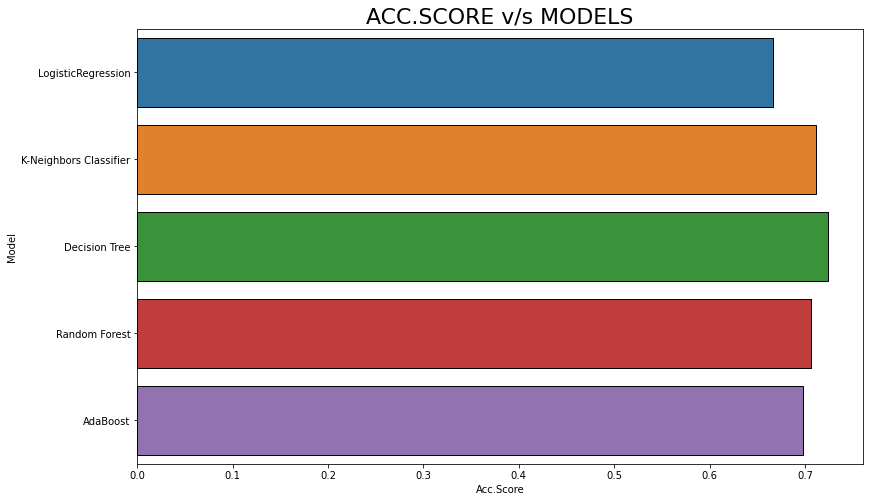

In [42]:
plt.figure(figsize=[13,8])
sbn.barplot(x=acc,y=ml_models,edgecolor='black')
plt.xlabel('Acc.Score')
plt.ylabel('Model')
plt.title('ACC.SCORE v/s MODELS',fontsize=22)
plt.show()

#### Let's Do Hyperparamter tuning on RandomForestClassifier

### Here  we do Hyperparameter Optimization using RandomizedSearchCV.Before starting with RandomizedSearchCV let's do some manual Hyperparameter Tuning.

## Manual Hyperparameter-Tuning


In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1500,criterion='entropy',max_depth=5,max_features='auto',min_samples_leaf=4,min_samples_split=7,random_state=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=7, n_estimators=1500, random_state=10)

In [44]:
y_pred = rfc.predict(x_test)

In [45]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[185  46]
 [103 152]]
0.6934156378600823
              precision    recall  f1-score   support

           0       0.64      0.80      0.71       231
           1       0.77      0.60      0.67       255

    accuracy                           0.69       486
   macro avg       0.71      0.70      0.69       486
weighted avg       0.71      0.69      0.69       486



#### It becomes very difficult and frustrating to just keep trying various parameters and waiting for the best results so let's not wait and try RandomizedSearchCV

## RandomizedSearchCV

In [46]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=3000,num=30)]
criterion = ['gini','entropy',None]
max_features = ['auto','sqrt','log2',None]
max_depth = [int(x) for x in np.linspace(0,2000,20)]
min_samples_split = [int(x) for x in range(-10,16)]
min_samples_leaf = [int(x) for x in range(-16,16)]

In [47]:
params = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'criterion'    : criterion,
    'max_depth'    : max_depth,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split':min_samples_split
}

In [48]:
params

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500,
  1600,
  1700,
  1800,
  1900,
  2000,
  2100,
  2200,
  2300,
  2400,
  2500,
  2600,
  2700,
  2800,
  2900,
  3000],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'criterion': ['gini', 'entropy', None],
 'max_depth': [0,
  105,
  210,
  315,
  421,
  526,
  631,
  736,
  842,
  947,
  1052,
  1157,
  1263,
  1368,
  1473,
  1578,
  1684,
  1789,
  1894,
  2000],
 'min_samples_leaf': [-16,
  -15,
  -14,
  -13,
  -12,
  -11,
  -10,
  -9,
  -8,
  -7,
  -6,
  -5,
  -4,
  -3,
  -2,
  -1,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15],
 'min_samples_split': [-10,
  -9,
  -8,
  -7,
  -6,
  -5,
  -4,
  -3,
  -2,
  -1,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15]}

In [49]:
rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=params,n_iter=200,cv=5,verbose=True,random_state=33,n_jobs=-1)
rf_randomcv.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 16.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy', None],
                                        'max_depth': [0, 105, 210, 315, 421,
                                                      526, 631, 736, 842, 947,
                                                      1052, 1157, 1263, 1368,
                                                      1473, 1578, 1684, 1789,
                                                      1894, 2000],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [-16, -15, -14, -13,
                                                             -12, -11, -10, -9,
                                                             -8, -7, -6, -5, -4,
                                                   

In [50]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 526,
 'criterion': 'gini'}

In [51]:
rf_randomcv.best_score_

0.71205800943433

In [52]:
best_random_grid = rf_randomcv.best_estimator_
best_random_grid

RandomForestClassifier(max_depth=526, min_samples_leaf=2, n_estimators=2000)

In [53]:
y_pred = best_random_grid.predict(x_test)

In [54]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[173  58]
 [ 83 172]]
0.7098765432098766
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       231
           1       0.75      0.67      0.71       255

    accuracy                           0.71       486
   macro avg       0.71      0.71      0.71       486
weighted avg       0.71      0.71      0.71       486

